# Preamble

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import pickle


import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [102]:
path = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/Station_Daily_Rainfall_Data.pickle'
pickle_in = open(path,'rb')
daily_rainfall_dict = pickle.load(pickle_in)

In [103]:
path = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/station_information_W2E.pickle'
pickle_in = open(path,'rb')
station_information_W2E = pickle.load(pickle_in)

In [104]:
path_2 = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/MJO/MJO_df.pickle'
pickle_in_2 = open(path_2, 'rb')
MJO_df = pickle.load(pickle_in_2)

In [105]:
MJO_df.head()

,Name,Lat,Lon,Start,End,Length (years),Number of Wet Seasons,Number Bad Wet Seasons,Available Wet Seasons,Bad Wet Seasons
Station Number,,,,,,,,,,
5004,EXMOUTH GULF,-22.38,114.11,1915,2018,103,104,5,99,"[1925, 2009, 2011, 2012, 2018]"
5008,MARDIE,-21.19,115.98,1885,2018,133,134,25,109,"[1885, 1886, 1887, 1888, 1889, 1890, 1891, 189..."
5014,MOUNT FLORANCE,-21.79,117.86,1886,2018,132,133,33,100,"[1886, 1887, 1888, 1889, 1890, 1891, 1892, 189..."
4006,BONNEY DOWNS,-22.18,119.94,1907,2018,111,112,9,103,"[1907, 1909, 1914, 1939, 1968, 1969, 1970, 199..."
3028,ANNA PLAINS,-19.25,121.49,1908,2018,110,111,40,71,"[1908, 1909, 1910, 1911, 1912, 1913, 1914, 191..."


In [106]:
current_stations = MJO_df.index
len(current_stations)

32

In [107]:
#This function gets the wet season that starts on the entered year.

march = 3
october = 10

def get_wet_season(data, start_year):
    wet_season = data.loc['%s-%s'%(str(start_year), str(october)):'%s-%s'%(str(start_year +1 ), str(march))]
    
    return wet_season

#  RMM

In [108]:
path = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/MJO/RMM.pickle'
pickle_in = open(path, 'rb')
RMM = pickle.load(pickle_in)

In [109]:
RMM.head()

,Phase,Amplitude
Date,,
1974-06-01,5.0,2.02948
1974-06-02,5.0,1.89729
1974-06-03,5.0,1.86476
1974-06-04,5.0,1.83092
1974-06-05,5.0,2.03326


# Old

<h1> Phase of Rainfall </h1>

Finding the raindays that are occuring during a specific phase of the MJO

In [110]:
#Calculating 

phase = 5

#Getting the rainday data for a single statin 
raindays = daily_rainfall_dict['2009']

#Getting only the dates where the RMM is the above mentioned phase
dates_in_phase = list(RMM.index[np.where(
    np.logical_and(
        RMM['Phase'] ==  phase, RMM['Amplitude'] > 1
    ))])



# The raindays that are in this phase (rainday > 1mm)
rainfall_in_phase = raindays.loc[raindays.index.isin(dates_in_phase)]
rainfall_in_phase  = rainfall_in_phase[rainfall_in_phase  > 1]

In [111]:
#The mean rainfall that is occuring during a specific phase
mean = rainfall_in_phase['Rainfall (mm)'].mean()
mean

14.3721649484536


Creating a df where the the raindays that occur on the same phase all occur togethere 

In [112]:
def phase_info_calc(raindays, phase):
    
    
#Getting the rainday data for a single statin 
    
    dates_in_phase = list(RMM.index[np.where(np.logical_and(
        RMM['Phase'] ==  phase, RMM['Amplitude'] > 1
    ))])



    rainfall_in_phase = raindays.loc[raindays.index.isin(dates_in_phase)]
    
    
    return rainfall_in_phase


In [113]:
station = '2009'
MJO = {}
raindays = daily_rainfall_dict[station]

for phase in range(1,9):
    MJO['Phase ' + str(phase)] = phase_info_calc(raindays, phase)

In [114]:
MJO['Phase 1'].head()

,Rainfall (mm)
Date,
1974-06-21,0.0
1974-06-22,0.0
1974-06-23,0.0
1974-09-04,0.0
1974-09-05,0.0


<h3> Single Sstation </h3>

In [115]:
mean_rain = []
RX1d = []
RI4 = []
df = pd.DataFrame()


#Going through all of the phases
MJO_phases = list(MJO.keys())
for phase in MJO_phases:
    
    #The Raindays in this phase
    data = MJO[phase]['Rainfall (mm)']
    
    #Rainday must be greater than 1 and less that 8000
    raindays = data[data > 1]
    raindays = raindays[raindays <8000]
    
    
    #The mean rainfall occuring during this phase
    rain_mean = raindays.mean()
    mean_rain.append(rain_mean)
    
    #The maximum rainfall that is occuring during this phase
    RX1d.append(np.max(raindays))
    
    
    #The top 4 raindays that occuring during this phase
    sorted_raindays = np.sort(raindays)
    T4 = sorted_raindays[-4:]
    RI4.append(np.sum(T4))
    
    
    
    
df['Phase'] = list(MJO.keys())
df['Mean'] = mean_rain
df['RX1d'] = RX1d
df['RI4'] = RI4
df = df.set_index('Phase')

In [116]:
df

,Mean,RX1d,RI4
Phase,,,
Phase 1,13.072727,118.0,309.8
Phase 2,14.194969,112.4,350.6
Phase 3,11.628986,64.6,236.6
Phase 4,14.735519,141.0,336.6
Phase 5,14.372165,123.6,368.2
Phase 6,16.326104,131.6,399.4
Phase 7,15.013080,105.0,323.0
Phase 8,13.168831,64.0,244.0


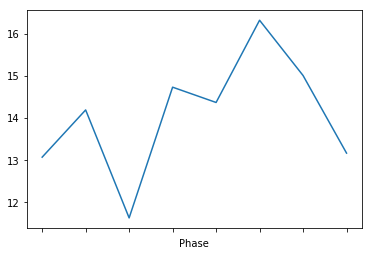

In [117]:
df['Mean'].plot()

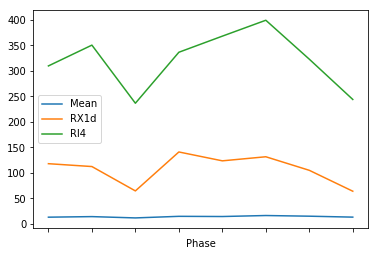

In [118]:
df.plot()

# RX1d

Finding the RX1d for each month and also that date at which it occured

In [122]:

#Dictionary for storing all the dates in, keys will be the stations
RX1d= {}


#The stations that I wall be using for the MJO
current_stations = MJO_df.index



############
for station in current_stations:

    #Only getting the rainfall data from the required time range
    rain_data = daily_rainfall_dict[station].loc['1974-06-01':'2010']
    
    #Removing all th years where the amount of data < 90%
    bad_years = MJO_df['Bad Wet Seasons'].loc[station]
    rain_data = rain_data[~rain_data.isin(bad_years)]
    
    
    #The following is based upon stack overflow ansewr:
    #https://stackoverflow.com/questions/54453126/maximum-monthly-values-whilst-retaining-the-data-at-which-that-values-occurred
    test_data = rain_data.copy(deep = True)
    test_data = test_data.reset_index() #Index has been reset in order to match what they have done

    maxs = test_data.sort_values('Rainfall (mm)').groupby([test_data.Date.dt.month, test_data.Date.dt.year]).tail(1)
    
    maxs = maxs.sort_values(by = 'Date') #Sorted via date, as previously it was sorted by 'Rainfall (mm)'
    maxs = maxs.set_index('Date')
    
    #Storing the values in a Dictionary
    RX1d[station] = maxs
    
    



Now to go through and match all of the RX1d values to the RMM

In [158]:
#Dictionary for storing all the RX1d values, as well as what the RMM phase and amp is for that date.
#keys will be the stations
MJO_RX1d= {}


#The stations that I wall be using for the MJO
current_stations = MJO_df.index

#I am only looking at the wet season months
wet_months = ['10','11','12','1','2','3']


for station in current_stations:
    
    #The RX1d for a specific station
    RX1d_station =  RX1d[station] 
    
    #Extracting only the wet season RX1d events
    RX1d_station = RX1d_station[RX1d_station.index.month.isin(wet_months)]
    
    
    #Combing the RX1d with the phase and amplitude of the RMM into the one data frame. These data frames are then
    #stored in the dictionary MJO_RX1d
    RMM_reduced = RMM[RMM.index.isin(RX1d_station.index)]
    df_new = pd.concat([RX1d_station,RMM_reduced], axis = 1)

    
    #The amplitude must be greater than one
    df_new = df_new[df_new['Amplitude'] > 1]
    
    #Don't want to look at dates where RX1d == 0
    df_new = df_new[df_new['Rainfall (mm)'] > 0]

    
    MJO_RX1d[station] = df_new
    

In [159]:
#Find the average intensity and also the frequency of occurence for RX1d for each phase of the MJO

RX1d_intensity = pd.DataFrame()
RX1d_frequency =pd.DataFrame()

current_stations = MJO_RX1d.keys()
mjo_phases = np.arange(1,9)

for station in current_stations:
    data = MJO_RX1d[station]
    
    intensity = []
    frequency = []
    
    for phase in mjo_phases:
        av_intensity = data[data['Phase'] == phase].mean(axis = 0)
        freq = len(data[data['Phase'] == phase])
        
        intensity.append(av_intensity[0])
        frequency.append(freq)
    
    
    RX1d_intensity[station] = intensity
    RX1d_frequency[station] = frequency
    
RX1d_intensity['Phase'] = mjo_phases
RX1d_intensity = RX1d_intensity.set_index('Phase')


RX1d_frequency['Phase'] = mjo_phases
RX1d_frequency = RX1d_frequency.set_index('Phase')

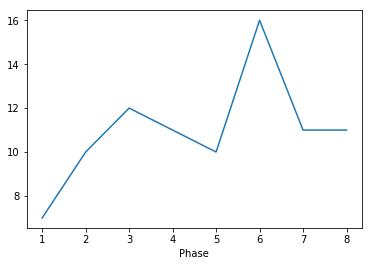

In [160]:
RX1d_frequency['2009'].plot()

In [161]:
'''Adding to a Dictionary'''

MJO_RX1d_dict = {}
MJO_RX1d_dict['Intensity (mm)'] = RX1d_intensity
MJO_RX1d_dict['Frequency'] = RX1d_frequency

In [153]:
# out_file = open('MJO_RX1d.pickle', 'wb')
# pickle.dump(MJO_RX1d, out_file)
# out_file.close()

# P90

In [128]:
path = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/Extreme Indices/station_monthly_climatologies.pickle'
pickle_in = open(path, 'rb')
station_monthly_climatologies = pickle.load(pickle_in)

In [129]:
len(station_monthly_climatologies.keys())

56

<h4> Making list of all the events that are greater than the 90th percentile </h4>

In [130]:

#As there is a df for every station, this is where all of the df's will be stored. Using the station number as
#as reference
P90_raindays = {}



#The stations that I will be using for the MJO
current_stations = MJO_df.index



############ Looping through all of the stations and finding the days > 90th percentile
for station in current_stations:
    
    #Remerging all of the data frames for each month back into the one dataframe
    repieced_df = pd.DataFrame()
    
    #Only getting the rainfall data from the required time range
    rain_data = daily_rainfall_dict[station].loc['1974-06-01':'2010']
    
    
    """ Getting Rid of Bad Wet Seasons"""
    #These are the wet seasons where there is less than 90% of the data available
    
    bad_years = MJO_df['Bad Wet Seasons'].loc[station]
    rain_data = rain_data[~rain_data.isin(bad_years)]
    
    
    """90th Percentile Climatology"""
    # The 90th percenilte for each month as calculated in exind_calc
    P90 = station_monthly_climatologies[station]['90th Percentile']
    
    #There is a different climatology for each month
    months = P90.index
        
    
    
    #For storing all of the dates and the rainfall values together, they can then be flattened and sorted.
    rainfall_array = []
    dates_array = []

    """Getting the 90th percentile rainfall for each of the months"""
    for i,month in enumerate(months):
        
        #Values for a specific month as climatologies are for individual months
        rain_data_specific_month = rain_data[rain_data.index.month  == month ]
        P90_specific_month = P90.loc[month]
        
        #Getting the rainfall events that are greater than the 90th percentile
        events_greater_90P = rain_data_specific_month[rain_data_specific_month['Rainfall (mm)'] > P90_specific_month]
        
        #Convering the rainfall and the dates to array
        rainfall_only = np.array(events_greater_90P['Rainfall (mm)'])
        dates_only = np.array(events_greater_90P.index)
        
        """Appending the rainfall and dates individually to a list, they can then be concatonated then sorted to form
        one consistent list"""
        rainfall_array.append(rainfall_only)
        dates_array.append(dates_only)
        
    
    """A flat list of all the different values together"""
    rainfall_flat = np.concatenate(rainfall_array)
    dates_flat = np.concatenate(dates_array)
    
    
    """ Putting the values into a dataframe and then sorting them in date order"""
    df = pd.DataFrame()
    df['Date'] = dates_flat
    df['Rainfall (mm)'] = rainfall_flat
    df = df.sort_values(by = 'Date')
    df = df.set_index('Date')
    
    
    #Adding in to the dictionary
    P90_raindays[station] = df

<h4> Getting the RMM values for events greater than the 90th Percentile </h1>

In [131]:
""" Getting the Phases of the RMM that correspond to evetns > than the 90th Percentile"""

MJO_P90 = {}

#The stations that I will be using for the MJO
current_stations = MJO_df.index

for station in current_stations:
    P90_val = P90_raindays[station]
    RMM_reduce = RMM[RMM.index.isin(P90_val.index)]
    
    #Combing the RMM and the RP90 days
    combined = pd.concat([P90_val, RMM_reduce], axis = 1)
    
    #Removing the events where amp < 1
    combined  = combined[combined['Amplitude'] > 1]
    
    #Adding all o fthe df's to a dictionary
    MJO_P90[station] = combined

In [132]:
MJO_P90['2009'].head()

,Rainfall (mm),Phase,Amplitude
Date,,,
1974-11-26,49.4,5.0,1.05443
1974-12-21,31.0,8.0,1.35984
1975-02-01,36.0,1.0,2.02628
1975-12-09,39.0,4.0,1.50607
1976-02-10,52.4,8.0,1.72448


<h4> Calculating the Exinds </h4>
So far just the days that are > 90th percentile have been calculated. Now the frequency of events > 90thP during each phase will be calculate, and other exinds.

In [133]:
#DF's to store all the results of all the phases in
P90_freq = pd.DataFrame()
P90_int = pd.DataFrame()

#The phases of the MJO
MJO_phases = np.arange(1,9)

for station in current_stations: #Calculations for all of the phases

    #All of the days for this station that are > 90th percentile
    P90_days = MJO_P90[station]
    
    #A list of all the frequencies per phase
    phase_freq = []
    phase_int = []
    
    for phase in MJO_phases: #Looping through all 8 phases of the MJO and getting days for each phase
        #Just the values >90th P for each phase
        P90_phase = P90_days[P90_days.Phase == phase]
        
        '''Average Intensity'''
        intensity = P90_phase['Rainfall (mm)'].mean()
        phase_int.append(intensity)
        
        '''Frequency'''
        #Frequency will be the length as this is the total amoutn of events occuring in this phase
        freq = len(P90_phase)
        
        #Appending to a list so then it can be added to the DF
        phase_freq.append(freq)
    
    #Storing the lists in dfs
    P90_int[station] = phase_int
    P90_freq[station] = phase_freq

        
'''Setting the Index as the Phases of the MJO'''
#Intensity
P90_int['Phase'] = MJO_phases
P90_int = P90_int.set_index('Phase')


#Frequency
P90_freq['Phase'] = MJO_phases
P90_freq = P90_freq.set_index('Phase')




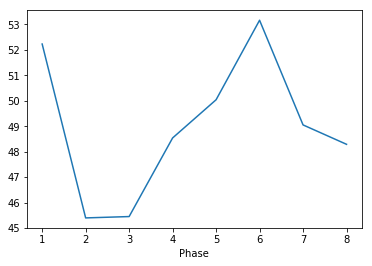

In [134]:
P90_int['2009'].plot()

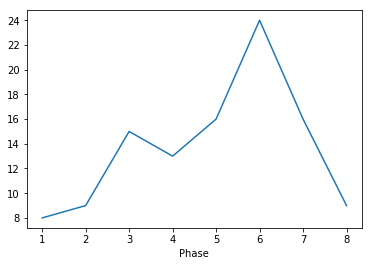

In [135]:
P90_freq['2009'].plot()

Storing all of the results in a dicionary. Then pickling the results

In [136]:
MJO_P90_dict = {}
MJO_P90_dict['Intensity (mm)'] = P90_int
MJO_P90_dict['Frequency'] = P90_freq

In [137]:
# out_file = open('MJO_P90.pickle', 'wb')
# pickle.dump(MJO_P90, out_file)
# out_file.close()

# P95

Finding the days that are greated than the 90th Percentile

In [138]:

#As there is a df for every station, this is where all of the df's will be stored. Using the station number as
#as reference
P95_raindays = {}



#The stations that I will be using for the MJO
current_stations = MJO_df.index



############ Looping through all of the stations and finding the days > 95th percentile
for station in current_stations:
    
    #Remerging all of the data frames for each month back into the one dataframe
    repieced_df = pd.DataFrame()
    
    #Only getting the rainfall data from the required time range
    rain_data = daily_rainfall_dict[station].loc['1974-06-01':'2010']
    
    
    """ Getting Rid of Bad Wet Seasons"""
    #These are the wet seasons where there is less than 95% of the data available
    
    bad_years = MJO_df['Bad Wet Seasons'].loc[station]
    rain_data = rain_data[~rain_data.isin(bad_years)]
    
    
    """95th Percentile Climatology"""
    # The 95th percenilte for each month as calculated in exind_calc
    P95 = station_monthly_climatologies[station]['95th Percentile']
    
    #There is a different climatology for each month
    months = P95.index
        
    
    
    #For storing all of the dates and the rainfall values together, they can then be flattened and sorted.
    rainfall_array = []
    dates_array = []

    """Getting the 95th percentile rainfall for each of the months"""
    for i,month in enumerate(months):
        
        #Values for a specific month as climatologies are for individual months
        rain_data_specific_month = rain_data[rain_data.index.month  == month ]
        P95_specific_month = P95.loc[month]
        
        #Getting the rainfall events that are greater than the 95th percentile
        events_greater_95P = rain_data_specific_month[rain_data_specific_month['Rainfall (mm)'] > P95_specific_month]
        
        #Convering the rainfall and the dates to array
        rainfall_only = np.array(events_greater_95P['Rainfall (mm)'])
        dates_only = np.array(events_greater_95P.index)
        
        """Appending the rainfall and dates individually to a list, they can then be concatonated then sorted to form
        one consistent list"""
        rainfall_array.append(rainfall_only)
        dates_array.append(dates_only)
        
    
    """A flat list of all the different values together"""
    rainfall_flat = np.concatenate(rainfall_array)
    dates_flat = np.concatenate(dates_array)
    
    
    """ Putting the values into a dataframe and then sorting them in date order"""
    df = pd.DataFrame()
    df['Date'] = dates_flat
    df['Rainfall (mm)'] = rainfall_flat
    df = df.sort_values(by = 'Date')
    df = df.set_index('Date')
    
    
    #Adding in to the dictionary
    P95_raindays[station] = df

Calculating what phase of the MJO that these events occur for

In [139]:
""" Getting the Phases of the RMM that correspond to evetns > than the 95th Percentile"""

MJO_P95 = {}

#The stations that I will be using for the MJO
current_stations = MJO_df.index

for station in current_stations:
    P95_val = P95_raindays[station]
    RMM_reduce = RMM[RMM.index.isin(P95_val.index)]
    
    #Combing the RMM and the RP95 days
    combined = pd.concat([P95_val, RMM_reduce], axis = 1)
    
    #Removing the events where amp < 1
    combined  = combined[combined['Amplitude'] > 1]
    
    #Adding all o fthe df's to a dictionary
    MJO_P95[station] = combined

Actually Calculating the extreme indices, e.g frequenct, average intensity

In [140]:
#DF's to store all the results of all the phases in
P95_freq = pd.DataFrame()
P95_int = pd.DataFrame()

#The phases of the MJO
MJO_phases = np.arange(1,9)

for station in current_stations: #Calculations for all of the phases

    #All of the days for this station that are > 95th percentile
    P95_days = MJO_P95[station]
    
    #A list of all the frequencies per phase
    phase_freq = []
    phase_int = []
    
    for phase in MJO_phases: #Looping through all 8 phases of the MJO and getting days for each phase
        #Just the values >95th P for each phase
        P95_phase = P95_days[P95_days.Phase == phase]
        
        '''Average Intensity'''
        intensity = P95_phase['Rainfall (mm)'].mean()
        phase_int.append(intensity)
        
        '''Frequency'''
        #Frequency will be the length as this is the total amoutn of events occuring in this phase
        freq = len(P95_phase)
        
        #Appending to a list so then it can be added to the DF
        phase_freq.append(freq)
    
    #Storing the lists in dfs
    P95_int[station] = phase_int
    P95_freq[station] = phase_freq

        
'''Setting the Index as the Phases of the MJO'''
#Intensity
P95_int['Phase'] = MJO_phases
P95_int = P95_int.set_index('Phase')


#Frequency
P95_freq['Phase'] = MJO_phases
P95_freq = P95_freq.set_index('Phase')


In [141]:
P95_freq

,5004,5008,5014,4006,3028,3030,3024,3017,3027,2009,...,29048,37001,37049,36028,28004,31055,31011,32040,33073,39049
Phase,,,,,,,,,,,,,,,,,,,,,
1,1,0,3,2,1,3,0,4,2,3,...,4,4,0,1,4,8,7,2,2,2
2,0,0,3,0,2,1,4,3,5,6,...,5,2,2,1,7,8,7,4,4,3
3,1,2,3,3,1,3,2,5,6,5,...,8,5,3,2,9,11,14,7,3,5
4,0,5,6,11,3,3,6,13,10,5,...,4,3,3,5,10,7,7,6,4,5
5,1,5,6,4,6,7,9,19,14,9,...,6,4,2,2,18,16,14,14,9,7
6,4,2,2,8,5,6,5,14,18,16,...,8,4,2,0,14,19,11,6,5,8
7,3,2,4,3,6,7,8,7,13,10,...,8,7,8,5,18,17,17,12,5,6
8,1,0,3,6,5,7,5,6,2,5,...,11,4,6,3,10,15,9,9,6,4


In [142]:
MJO_P95_dict = {}
MJO_P95_dict['Intensity (mm)'] = P95_int
MJO_P95_dict['Frequency'] = P95_freq

# P99

In [172]:

#As there is a df for every station, this is where all of the df's will be stored. Using the station number as
#as reference
P99_raindays = {}



#The stations that I will be using for the MJO
current_stations = MJO_df.index



############ Looping through all of the stations and finding the days > 99th percentile
for station in current_stations:
    
    #Remerging all of the data frames for each month back into the one dataframe
    repieced_df = pd.DataFrame()
    
    #Only getting the rainfall data from the required time range
    rain_data = daily_rainfall_dict[station].loc['1974-06-01':'2010']
    
    
    """ Getting Rid of Bad Wet Seasons"""
    #These are the wet seasons where there is less than 99% of the data available
    
    bad_years = MJO_df['Bad Wet Seasons'].loc[station]
    rain_data = rain_data[~rain_data.isin(bad_years)]
    
    
    """99th Percentile Climatology"""
    # The 99th percenilte for each month as calculated in exind_calc
    P99 = station_monthly_climatologies[station]['99th Percentile']
    
    #There is a different climatology for each month
    months = P99.index
        
    
    
    #For storing all of the dates and the rainfall values together, they can then be flattened and sorted.
    rainfall_array = []
    dates_array = []

    """Getting the 99th percentile rainfall for each of the months"""
    for i,month in enumerate(months):
        
        #Values for a specific month as climatologies are for individual months
        rain_data_specific_month = rain_data[rain_data.index.month  == month ]
        P99_specific_month = P99.loc[month]
        
        #Getting the rainfall events that are greater than the 99th percentile
        events_greater_99P = rain_data_specific_month[rain_data_specific_month['Rainfall (mm)'] > P99_specific_month]
        
        #Convering the rainfall and the dates to array
        rainfall_only = np.array(events_greater_99P['Rainfall (mm)'])
        dates_only = np.array(events_greater_99P.index)
        
        """Appending the rainfall and dates individually to a list, they can then be concatonated then sorted to form
        one consistent list"""
        rainfall_array.append(rainfall_only)
        dates_array.append(dates_only)
        
    
    """A flat list of all the different values together"""
    rainfall_flat = np.concatenate(rainfall_array)
    dates_flat = np.concatenate(dates_array)
    
    
    """ Putting the values into a dataframe and then sorting them in date order"""
    df = pd.DataFrame()
    df['Date'] = dates_flat
    df['Rainfall (mm)'] = rainfall_flat
    df = df.sort_values(by = 'Date')
    df = df.set_index('Date')
    
    
    #Adding in to the dictionary
    P99_raindays[station] = df

In [173]:
""" Getting the Phases of the RMM that correspond to evetns > than the 99th Percentile"""

MJO_P99 = {}

#The stations that I will be using for the MJO
current_stations = MJO_df.index

for station in current_stations:
    P99_val = P99_raindays[station]
    RMM_reduce = RMM[RMM.index.isin(P99_val.index)]
    
    #Combing the RMM and the RP99 days
    combined = pd.concat([P99_val, RMM_reduce], axis = 1)
    
    #Removing the events where amp < 1
    combined  = combined[combined['Amplitude'] > 1]
    
    #Adding all o fthe df's to a dictionary
    MJO_P99[station] = combined

In [174]:
#DF's to store all the results of all the phases in
P99_freq = pd.DataFrame()
P99_int = pd.DataFrame()

#The phases of the MJO
MJO_phases = np.arange(1,9)

for station in current_stations: #Calculations for all of the phases

    #All of the days for this station that are > 99th percentile
    P99_days = MJO_P99[station]
    
    #A list of all the frequencies per phase
    phase_freq = []
    phase_int = []
    
    for phase in MJO_phases: #Looping through all 8 phases of the MJO and getting days for each phase
        #Just the values >99th P for each phase
        P99_phase = P99_days[P99_days.Phase == phase]
        
        '''Average Intensity'''
        intensity = P99_phase['Rainfall (mm)'].mean()
        phase_int.append(intensity)
        
        '''Frequency'''
        #Frequency will be the length as this is the total amoutn of events occuring in this phase
        freq = len(P99_phase)
        
        #Appending to a list so then it can be added to the DF
        phase_freq.append(freq)
    
    #Storing the lists in dfs
    P99_int[station] = phase_int
    P99_freq[station] = phase_freq

        
'''Setting the Index as the Phases of the MJO'''
#Intensity
P99_int['Phase'] = MJO_phases
P99_int = P99_int.set_index('Phase')


#Frequency
P99_freq['Phase'] = MJO_phases
P99_freq = P99_freq.set_index('Phase')


In [177]:
MJO_P99_dict = {}
MJO_P99_dict['Intensity (mm)'] = P99_int
MJO_P99_dict['Frequency'] = P99_freq

# Pickle All

Pickle For The Exinds

In [178]:
MJO_Exinds = {'RX1d': MJO_RX1d_dict , 'P90': MJO_P90_dict, 'P95': MJO_P95_dict ,'P99':MJO_P99_dict}

In [179]:
out_file = open('MJO_Exinds.pickle','wb')
pickle.dump(MJO_Exinds, out_file)
out_file.close()

Pickle For the Actual Extreme Days. This will be used to combine with ENSO

In [181]:
MJO_ex_days = { 'RX1d': MJO_RX1d, 'P90': MJO_P90,'P95': MJO_P95,'P99': MJO_P99}

In [182]:
out_file = open('MJO_ex_days.pickle','wb')
pickle.dump(MJO_ex_days, out_file)
out_file.close()